In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression,Ridge
import matplotlib.pyplot
import scipy
import numpy as np

In [2]:
import yfinance
# from yfinance.data import TickerData


In [3]:
data=yfinance.download('F','2008-01-01','2021-01-19',auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['F']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2008-01-01 -> 2021-01-19)')


In [15]:
stocks='NG=F'
data1=yfinance.download(stocks,'2008-01-01','2021-01-18',auto_adjust=True)


[*********************100%%**********************]  1 of 1 completed


In [16]:
data1.shape

(3282, 5)

In [17]:
data1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


<Axes: xlabel='Date'>

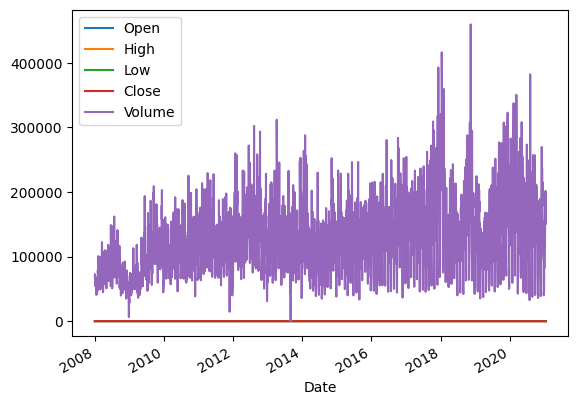

In [19]:
data1.plot()

<Axes: xlabel='Date'>

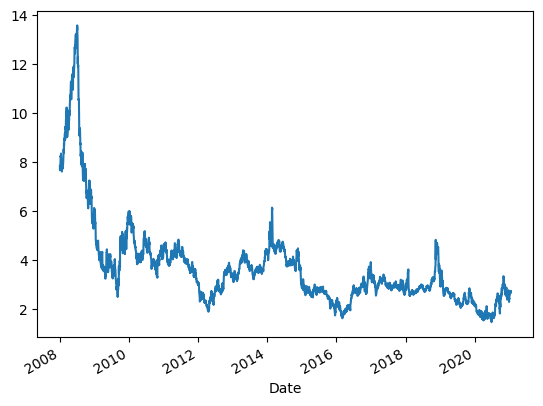

In [20]:
data1['Close'].plot()

In [21]:
lin_model=LinearRegression()

In [22]:
from sklearn.model_selection import train_test_split

<Axes: xlabel='Date'>

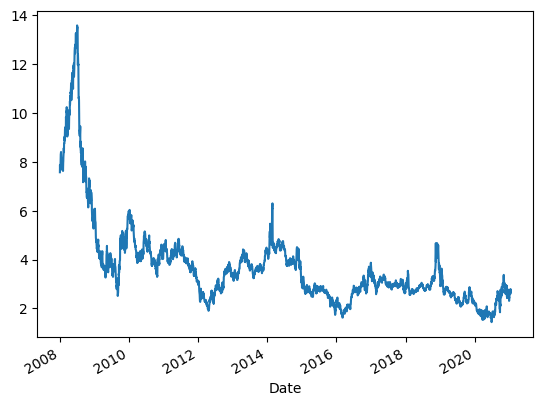

In [23]:
data1['Open'].plot()

<Axes: xlabel='Date'>

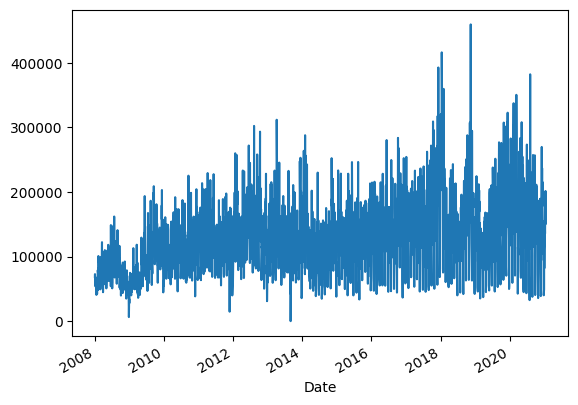

In [24]:
data1['Volume'].plot()

In [25]:
train_data,test_data=train_test_split(data1,test_size=0.2,random_state=42)

In [26]:
print(train_data.shape)

(2625, 5)


In [27]:
print(test_data.shape)

(657, 5)


In [28]:
test_data_y=test_data['Close']
test_data=test_data.drop('Close',axis=1)
train_data_y=train_data['Close']
train_data=train_data.drop('Close',axis=1)

In [29]:
lin_model.fit(train_data,train_data_y)

LinearRegression()

In [30]:
res=lin_model.predict(test_data)

In [31]:
from sklearn.metrics import mean_squared_error
val=mean_squared_error(res,test_data_y)

In [32]:
val

0.001972836301429629

In [33]:
np.sqrt(val)

0.044416621904751256

In [34]:
print(res)

[ 3.83019219  3.47313796  2.87406809  3.80620424  2.57759868  2.232131
  2.85302805  5.68208257  3.67209084  4.13720952  1.75062183  5.82750476
  4.05391444  5.48907306  4.29216737  3.08202241  2.52294158  4.00205412
  2.49664994  2.95594217  3.65201616  3.37884446  4.85117162  3.91404267
  1.99344795 11.54530512  2.89753604  4.60487719  3.05508498  9.38751446
  3.00451494  5.46902223  3.95916214 11.25794985  2.62246528  3.1543544
  2.26413496  2.86784235  2.94946557  2.53538423  2.72384783  2.29996489
  3.80163457  2.96489309  3.56885202  1.64711675  2.81766265  8.68958623
  3.92674805  9.96303892  4.4981776   2.10995805  3.57998536  1.85936209
  4.79595458  2.63365331  2.95184353  4.62054248  4.40709762  2.80338007
  3.25846903  1.64186774  2.24837235  3.89992431  4.85842873  9.98057871
  6.82101452  2.17894188  3.8338919   2.15144541  2.64961039  2.08241469
  2.30767688  2.2664295   3.5813688   2.18235741  2.81387932  3.7263045
  2.76181177  4.16545085  2.65202139  3.23099881  1.662

In [35]:
print(test_data_y)

Date
2014-08-01    3.798
2013-02-28    3.486
2017-08-09    2.883
2014-07-23    3.762
2018-02-23    2.625
              ...  
2019-12-20    2.328
2019-06-03    2.403
2017-02-08    3.126
2009-09-24    3.955
2016-10-05    3.041
Name: Close, Length: 657, dtype: float64


In [36]:
from sklearn.metrics import r2_score
r2_score(test_data_y,res)

0.9994434122669321

In [40]:
from scipy.stats import kurtosis,skew

In [41]:
data1['Close'].skew()

2.611315764580529

In [42]:
data1['Close'].kurtosis()

8.323553170256787

In [43]:
import joblib

In [44]:
joblib.dump(lin_model,'model.pkl')

['model.pkl']